In [1]:
#import necessary module
import os
import sys
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context = 'notebook', style = 'white', palette = 'dark')
from IPython.display import Image


In [2]:
sys.path.append('..//')
from scipy import stats
import re
import matplotlib as mpl
import matplotlib.colors as colors


## Reference: https://pypi.org/project/simplydrug/

In [3]:
pip install simplydrug

     |████████████████████████████████| 678 kB 34.7 MB/s eta 0:00:01
     |████████████████████████████████| 10.1 MB 101.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 82.1 MB/s eta 0:00:01
     |████████████████████████████████| 152 kB 102.4 MB/s eta 0:00:01
  Created wheel for simplydrug: filename=simplydrug-0.0.4-py3-none-any.whl size=18015 sha256=150d3302bb866517f71dd31114ad54e23d5a63939386a6e70eb3ae71276f1381
  Stored in directory: /home/jovyan/.cache/pip/wheels/e7/68/14/19167e7f17639140c89bfb34da0f9749bc0ef005828cb41c31
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13825 sha256=232f8f0a6b93b39c2b5e317127e173a05db0f4f7dd9729054d4d4f4180e9ab7a
  Stored in directory: /home/jovyan/.cache/pip/wheels/7c/3d/8c/8192697412e9899dc55bbbb08bbc1197bef333caaa2a71c448
  Created wheel for python-pptx: filename=python_pptx-0.6.21-py3-none-any.whl size=471172 sha256=e7b9710a4b828288ac15987c9ce7d3b5cce4cf335216efce6ab0bcb05707d529
  Stored in direc

In [4]:
import simplydrug as sd

In [5]:
#if working on local computer create an outfile that goes into local computer directory.
path = ('gdsc_nomalized_curve_fit_output')
#path =('C:\\Users\\Duvadie\\Desktop\\gdsc_curve_fit_output')
if not os.path.exists(path):
    os.mkdir(path)
    print('Output folder created')

In [6]:
#read GDSC2 raw data
#data drom Alyson
gdsc_data_2 = pd.read_csv('assets/gdsc_triplicates.csv')
gdsc_data_2.head()

,DRUGSET_ID,CELL_ID,DRUG_ID,TAG,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,SEEDING_DENSITY,ASSAY,DURATION,POSITION,CONC,INTENSITY,norm_intensity
0,427,2419,1060.0,R2-D7-S,GDSC_005-A,31617,30392,2017-07-20T23:00:00Z,2017-07-24T23:00:00Z,2256,924187,KLE,SIDM00686,300.0,Glo,4.0,1312,0.000250,19685,1.152308
1,427,2419,1060.0,R2-D7-S,GDSC_005-A,32440,31129,2017-08-09T23:00:00Z,2017-08-13T23:00:00Z,2256,924187,KLE,SIDM00686,300.0,Glo,4.0,1312,0.000250,17200,1.006842
2,427,2419,1060.0,R2-D7-S,GDSC_005-A,32441,31130,2017-08-09T23:00:00Z,2017-08-13T23:00:00Z,2256,924187,KLE,SIDM00686,300.0,Glo,4.0,1312,0.000250,23030,1.348115
3,427,2419,1060.0,R2-D6-S,GDSC_005-A,31617,30392,2017-07-20T23:00:00Z,2017-07-24T23:00:00Z,2256,924187,KLE,SIDM00686,300.0,Glo,4.0,1311,0.000791,21596,1.264173
4,427,2419,1060.0,R2-D6-S,GDSC_005-A,32440,31129,2017-08-09T23:00:00Z,2017-08-13T23:00:00Z,2256,924187,KLE,SIDM00686,300.0,Glo,4.0,1311,0.000791,19971,1.169049


In [7]:
print(gdsc_data_2.shape)

(224427, 20)


In [8]:
gdsc_data_2.dtypes

DRUGSET_ID           object
CELL_ID               int64
DRUG_ID             float64
TAG                  object
RESEARCH_PROJECT     object
BARCODE              object
SCAN_ID               int64
DATE_CREATED         object
SCAN_DATE            object
MASTER_CELL_ID        int64
COSMIC_ID             int64
CELL_LINE_NAME       object
SANGER_MODEL_ID      object
SEEDING_DENSITY     float64
ASSAY                object
DURATION            float64
POSITION              int64
CONC                float64
INTENSITY             int64
norm_intensity      float64
dtype: object

In [9]:
Failed_drugs = gdsc_data_2.loc[gdsc_data_2['TAG'] == 'FAIL']
print(Failed_drugs.shape)

(0, 20)


In [10]:
DMSO = gdsc_data_2.loc[gdsc_data_2['TAG'] == 'DMSO']
print(DMSO.shape)


(0, 20)


In [11]:
gdsc_data_2= gdsc_data_2[gdsc_data_2.TAG != 'DMSO']

In [12]:
print(gdsc_data_2.shape)

(224427, 20)


In [13]:
gdsc_data_2.rename(columns = {'DRUG_ID':'Compound_id'}, inplace = True)
gdsc_data_2['Compound_id'] = gdsc_data_2['Compound_id'].astype(str)

In [14]:
Reference_compounds = gdsc_data_2.loc[gdsc_data_2['TAG'] == 'R1-D1-S']
print(Reference_compounds.shape)

(351, 20)


In [15]:
Reference_compounds.head()

,DRUGSET_ID,CELL_ID,Compound_id,TAG,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,SEEDING_DENSITY,ASSAY,DURATION,POSITION,CONC,INTENSITY,norm_intensity
39,427,2419,1003.0,R1-D1-S,GDSC_005-A,31617,30392,2017-07-20T23:00:00Z,2017-07-24T23:00:00Z,2256,924187,KLE,SIDM00686,300.0,Glo,4.0,1258,0.1,16053,0.939700
40,427,2419,1003.0,R1-D1-S,GDSC_005-A,32440,31129,2017-08-09T23:00:00Z,2017-08-13T23:00:00Z,2256,924187,KLE,SIDM00686,300.0,Glo,4.0,1258,0.1,18347,1.073985
41,427,2419,1003.0,R1-D1-S,GDSC_005-A,32441,31130,2017-08-09T23:00:00Z,2017-08-13T23:00:00Z,2256,924187,KLE,SIDM00686,300.0,Glo,4.0,1258,0.1,16627,0.973300
126,427,6850,1003.0,R1-D1-S,GDSC_005-A,29535,28419,2017-05-31T23:00:00Z,2017-06-04T23:00:00Z,1553,905937,HCT-15,SIDM00789,150.0,Glo,4.0,1258,0.1,11466,0.544584
127,427,6850,1003.0,R1-D1-S,GDSC_005-A,29534,28420,2017-05-31T23:00:00Z,2017-06-04T23:00:00Z,1553,905937,HCT-15,SIDM00789,150.0,Glo,4.0,1258,0.1,13091,0.621764


In [16]:
Negative_control_NC_0 = gdsc_data_2.loc[gdsc_data_2['TAG'] == 'NC-0']
print(Negative_control_NC_0.shape)


(0, 20)


In [17]:
Negative_control_NC_1 = gdsc_data_2.loc[gdsc_data_2['TAG'] == 'NC-1']
print(Negative_control_NC_1.shape)

(0, 20)


In [18]:
Positive_control_PC_1 = gdsc_data_2.loc[gdsc_data_2['TAG'] == 'PC-1']
print(Positive_control_PC_1.shape)


(0, 20)


In [19]:
Positive_control_PC1_D1_S = gdsc_data_2.loc[gdsc_data_2['TAG'] == 'PC1-D1-S']
print(Positive_control_PC1_D1_S.shape)


(0, 20)


In [20]:
Failed_drugs = gdsc_data_2.loc[gdsc_data_2['Compound_id'] == 'FAIL']
print(Failed_drugs.shape)

(0, 20)


In [21]:
#create function put values of TAG on status column
def my_func(row):
    if row['TAG'] == 'NC-0':
        val = 'Negative'
    elif row['TAG']  == 'NC-1':
        val = 'Negative'
    elif row['TAG']  == 'PC-1':
        val = 'Positive'
    elif row['TAG']  == 'PC1-D1-S':
        val = 'Positive'
    elif row['TAG']  == 'R1-D1-S':
        val = 'Reference'
    elif row['TAG']  == 'B':
        val = 'Blank'
    elif row['TAG']  == 'UN-USED':
        val = 'Reference'
    else:
        val = 'Sample'
    return val

gdsc_data_2['Status'] = gdsc_data_2.apply(my_func, axis=1)
gdsc_data_2.head()

,DRUGSET_ID,CELL_ID,Compound_id,TAG,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,MASTER_CELL_ID,...,CELL_LINE_NAME,SANGER_MODEL_ID,SEEDING_DENSITY,ASSAY,DURATION,POSITION,CONC,INTENSITY,norm_intensity,Status
0,427,2419,1060.0,R2-D7-S,GDSC_005-A,31617,30392,2017-07-20T23:00:00Z,2017-07-24T23:00:00Z,2256,...,KLE,SIDM00686,300.0,Glo,4.0,1312,0.000250,19685,1.152308,Sample
1,427,2419,1060.0,R2-D7-S,GDSC_005-A,32440,31129,2017-08-09T23:00:00Z,2017-08-13T23:00:00Z,2256,...,KLE,SIDM00686,300.0,Glo,4.0,1312,0.000250,17200,1.006842,Sample
2,427,2419,1060.0,R2-D7-S,GDSC_005-A,32441,31130,2017-08-09T23:00:00Z,2017-08-13T23:00:00Z,2256,...,KLE,SIDM00686,300.0,Glo,4.0,1312,0.000250,23030,1.348115,Sample
3,427,2419,1060.0,R2-D6-S,GDSC_005-A,31617,30392,2017-07-20T23:00:00Z,2017-07-24T23:00:00Z,2256,...,KLE,SIDM00686,300.0,Glo,4.0,1311,0.000791,21596,1.264173,Sample
4,427,2419,1060.0,R2-D6-S,GDSC_005-A,32440,31129,2017-08-09T23:00:00Z,2017-08-13T23:00:00Z,2256,...,KLE,SIDM00686,300.0,Glo,4.0,1311,0.000791,19971,1.169049,Sample


In [22]:
gdsc_data_2.dropna(subset=['Compound_id'], inplace=True)
gdsc_data_2.head()

INFO:numexpr.utils:Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,DRUGSET_ID,CELL_ID,Compound_id,TAG,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,MASTER_CELL_ID,...,CELL_LINE_NAME,SANGER_MODEL_ID,SEEDING_DENSITY,ASSAY,DURATION,POSITION,CONC,INTENSITY,norm_intensity,Status
0,427,2419,1060.0,R2-D7-S,GDSC_005-A,31617,30392,2017-07-20T23:00:00Z,2017-07-24T23:00:00Z,2256,...,KLE,SIDM00686,300.0,Glo,4.0,1312,0.000250,19685,1.152308,Sample
1,427,2419,1060.0,R2-D7-S,GDSC_005-A,32440,31129,2017-08-09T23:00:00Z,2017-08-13T23:00:00Z,2256,...,KLE,SIDM00686,300.0,Glo,4.0,1312,0.000250,17200,1.006842,Sample
2,427,2419,1060.0,R2-D7-S,GDSC_005-A,32441,31130,2017-08-09T23:00:00Z,2017-08-13T23:00:00Z,2256,...,KLE,SIDM00686,300.0,Glo,4.0,1312,0.000250,23030,1.348115,Sample
3,427,2419,1060.0,R2-D6-S,GDSC_005-A,31617,30392,2017-07-20T23:00:00Z,2017-07-24T23:00:00Z,2256,...,KLE,SIDM00686,300.0,Glo,4.0,1311,0.000791,21596,1.264173,Sample
4,427,2419,1060.0,R2-D6-S,GDSC_005-A,32440,31129,2017-08-09T23:00:00Z,2017-08-13T23:00:00Z,2256,...,KLE,SIDM00686,300.0,Glo,4.0,1311,0.000791,19971,1.169049,Sample


In [23]:
print(gdsc_data_2.shape)

(224427, 21)


In [24]:
print(gdsc_data_2.shape)

(224427, 21)


In [25]:
#get triplicate, code from Sinead

gdsc_data_2_triplicate = gdsc_data_2.groupby(["Compound_id","CELL_LINE_NAME"]).agg({"BARCODE":pd.Series.nunique})
gdsc_data_2_triplicate.head(100)

BARCODE
Compound_id CELL_LINE_NAME         
1.0         KALS-1                3
1001.0      BALL-1                3
            CAL-72                3
            DB                    3
            DBTRG-05MG            3
...                             ...
1004.0      OCI-M1                3
            P12-ICHIKAWA          3
            PC-14                 3
            SBC-1                 3
            SK-N-DZ               3

[100 rows x 1 columns]

In [26]:
#get triplicate, code from Sinead

gdsc_data_2_triplicate_extract = gdsc_data_2_triplicate[gdsc_data_2_triplicate.BARCODE ==3]
gdsc_data_2_triplicate_extract =gdsc_data_2_triplicate_extract.reset_index()


In [27]:
#get triplicate, code from Sinead

extracted_triplicate = gdsc_data_2_triplicate_extract.drop(['BARCODE'], axis=1)
extracted_triplicate.head(20)

,Compound_id,CELL_LINE_NAME
0,1.0,KALS-1
1,1001.0,BALL-1
2,1001.0,CAL-72
3,1001.0,DB
4,1001.0,DBTRG-05MG
5,1001.0,HuO-3N1
6,1001.0,MFE-280
7,1001.0,NY
8,1001.0,SK-N-DZ
9,1003.0,A3-KAW


In [28]:
# Calling merge() function

trplicate_gdsc_2 = pd.merge(extracted_triplicate, gdsc_data_2, how ='inner', on =['Compound_id', 'CELL_LINE_NAME'])
trplicate_gdsc_2.head()

,Compound_id,CELL_LINE_NAME,DRUGSET_ID,CELL_ID,TAG,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,...,COSMIC_ID,SANGER_MODEL_ID,SEEDING_DENSITY,ASSAY,DURATION,POSITION,CONC,INTENSITY,norm_intensity,Status
0,1.0,KALS-1,15_a_7,2416,L1-D1-S,MGH_GDSC1,015_8083_0001102,35237,2010-07-11T23:00:00Z,NaN,...,907271,SIDM00613,NaN,a,3.0,27,2.000000,250701,1.015526,Sample
1,1.0,KALS-1,15_a_7,2416,L1-D1-S,MGH_GDSC1,015_8083_0001913,35238,2010-08-23T23:00:00Z,NaN,...,907271,SIDM00613,NaN,a,3.0,27,2.000000,162118,0.656699,Sample
2,1.0,KALS-1,15_a_7,2416,L1-D1-S,MGH_GDSC1,015_8083_0002792,35239,2010-09-01T23:00:00Z,NaN,...,907271,SIDM00613,NaN,a,3.0,27,2.000000,235559,0.954190,Sample
3,1.0,KALS-1,15_a_7,2416,L1-D9-S,MGH_GDSC1,015_8083_0001102,35237,2010-07-11T23:00:00Z,NaN,...,907271,SIDM00613,NaN,a,3.0,35,0.007812,261352,1.058671,Sample
4,1.0,KALS-1,15_a_7,2416,L1-D9-S,MGH_GDSC1,015_8083_0001913,35238,2010-08-23T23:00:00Z,NaN,...,907271,SIDM00613,NaN,a,3.0,35,0.007812,129634,0.525115,Sample


In [29]:
Triplicate_data = trplicate_gdsc_2[['CELL_LINE_NAME','Compound_id','DRUGSET_ID', 'BARCODE','COSMIC_ID','CONC', 'INTENSITY','norm_intensity']]
Triplicate_data.head()

,CELL_LINE_NAME,Compound_id,DRUGSET_ID,BARCODE,COSMIC_ID,CONC,INTENSITY,norm_intensity
0,KALS-1,1.0,15_a_7,015_8083_0001102,907271,2.000000,250701,1.015526
1,KALS-1,1.0,15_a_7,015_8083_0001913,907271,2.000000,162118,0.656699
2,KALS-1,1.0,15_a_7,015_8083_0002792,907271,2.000000,235559,0.954190
3,KALS-1,1.0,15_a_7,015_8083_0001102,907271,0.007812,261352,1.058671
4,KALS-1,1.0,15_a_7,015_8083_0001913,907271,0.007812,129634,0.525115


In [30]:
Triplicate_data_1= Triplicate_data.drop(columns=['INTENSITY'])
Triplicate_data_1.head()
#Triplicate_data_grouped= Triplicate_data_1.groupby(["Compound_id","CELL_LINE_NAME"]).mean().round(2)
#Triplicate_data_grouped

,CELL_LINE_NAME,Compound_id,DRUGSET_ID,BARCODE,COSMIC_ID,CONC,norm_intensity
0,KALS-1,1.0,15_a_7,015_8083_0001102,907271,2.000000,1.015526
1,KALS-1,1.0,15_a_7,015_8083_0001913,907271,2.000000,0.656699
2,KALS-1,1.0,15_a_7,015_8083_0002792,907271,2.000000,0.954190
3,KALS-1,1.0,15_a_7,015_8083_0001102,907271,0.007812,1.058671
4,KALS-1,1.0,15_a_7,015_8083_0001913,907271,0.007812,0.525115


In [31]:
Triplicate_data_1.rename(columns = {'norm_intensity':'INTENSITY'}, inplace = True)
Triplicate_data_1.head()
print(Triplicate_data_1.shape)

(146967, 7)


### Try out with compound_id and cell_line_name from A388 cell_line on compound_1003

In [32]:
#extract relevant rows

Data_KALS_1_for_1 = Triplicate_data_1.loc[(Triplicate_data_1['CELL_LINE_NAME'] == 'KALS-1') & (Triplicate_data_1['Compound_id'] == '1.0')]
Data_KALS_1_for_1.head()

,CELL_LINE_NAME,Compound_id,DRUGSET_ID,BARCODE,COSMIC_ID,CONC,INTENSITY
0,KALS-1,1.0,15_a_7,015_8083_0001102,907271,2.000000,1.015526
1,KALS-1,1.0,15_a_7,015_8083_0001913,907271,2.000000,0.656699
2,KALS-1,1.0,15_a_7,015_8083_0002792,907271,2.000000,0.954190
3,KALS-1,1.0,15_a_7,015_8083_0001102,907271,0.007812,1.058671
4,KALS-1,1.0,15_a_7,015_8083_0001913,907271,0.007812,0.525115


### Try out with compound_id and cell_line_name from BALL-1 cell_line on compound_1004

In [33]:
#extract relevant rows
Data_BALL_1_for_1004 = Triplicate_data_1.loc[(Triplicate_data_1['CELL_LINE_NAME'] == 'BALL-1') & (Triplicate_data_1['Compound_id'] == '1004.0')]
Data_BALL_1_for_1004.head()


,CELL_LINE_NAME,Compound_id,DRUGSET_ID,BARCODE,COSMIC_ID,CONC,INTENSITY
1209,BALL-1,1004.0,505_a_6,400308,910705,0.000781,0.834616
1210,BALL-1,1004.0,505_a_6,400310,910705,0.000781,0.805421
1211,BALL-1,1004.0,505_a_6,103708,910705,0.000781,0.999819
1212,BALL-1,1004.0,505_a_6,400308,910705,0.000391,0.865425
1213,BALL-1,1004.0,505_a_6,400310,910705,0.000391,0.813990


### Try out with compound_id and cell_line_name from PC-14 cell_line on compound_1004

In [34]:
#extract relevant rows
Data_PC_14_for_1004 = Triplicate_data_1.loc[(Triplicate_data_1['CELL_LINE_NAME'] == 'PC-14') & (Triplicate_data_1['Compound_id'] == '1004.0')]
Data_PC_14_for_1004.head()


,CELL_LINE_NAME,Compound_id,DRUGSET_ID,BARCODE,COSMIC_ID,CONC,INTENSITY
1614,PC-14,1004.0,284,19332,753608,0.100000,0.204445
1615,PC-14,1004.0,284,19333,753608,0.100000,0.273444
1616,PC-14,1004.0,284,19334,753608,0.100000,0.324886
1617,PC-14,1004.0,284,19332,753608,0.031626,0.230788
1618,PC-14,1004.0,284,19333,753608,0.031626,0.242078


## Create a new column with cell_line_name+compound_id

In [35]:
#combine CELL_LINE_NAME and Compound_id columns into new column, with _ in between 
curve_data_combined = Triplicate_data_1.copy()
curve_data_combined['CELL_LINE_NAME_Compound_id'] = curve_data_combined['CELL_LINE_NAME'] + '_' + curve_data_combined['Compound_id']
curve_data_combined.head()

,CELL_LINE_NAME,Compound_id,DRUGSET_ID,BARCODE,COSMIC_ID,CONC,INTENSITY,CELL_LINE_NAME_Compound_id
0,KALS-1,1.0,15_a_7,015_8083_0001102,907271,2.000000,1.015526,KALS-1_1.0
1,KALS-1,1.0,15_a_7,015_8083_0001913,907271,2.000000,0.656699,KALS-1_1.0
2,KALS-1,1.0,15_a_7,015_8083_0002792,907271,2.000000,0.954190,KALS-1_1.0
3,KALS-1,1.0,15_a_7,015_8083_0001102,907271,0.007812,1.058671,KALS-1_1.0
4,KALS-1,1.0,15_a_7,015_8083_0001913,907271,0.007812,0.525115,KALS-1_1.0


In [36]:
curve_data_combined.dtypes

CELL_LINE_NAME                 object
Compound_id                    object
DRUGSET_ID                     object
BARCODE                        object
COSMIC_ID                       int64
CONC                          float64
INTENSITY                     float64
CELL_LINE_NAME_Compound_id     object
dtype: object

In [37]:
#combine CELL_LINE_NAME and Compound_id columns into new column, with _ in between 
curve_data_combined_with_drug_set = Triplicate_data_1.copy()
curve_data_combined_with_drug_set.head()

,CELL_LINE_NAME,Compound_id,DRUGSET_ID,BARCODE,COSMIC_ID,CONC,INTENSITY
0,KALS-1,1.0,15_a_7,015_8083_0001102,907271,2.000000,1.015526
1,KALS-1,1.0,15_a_7,015_8083_0001913,907271,2.000000,0.656699
2,KALS-1,1.0,15_a_7,015_8083_0002792,907271,2.000000,0.954190
3,KALS-1,1.0,15_a_7,015_8083_0001102,907271,0.007812,1.058671
4,KALS-1,1.0,15_a_7,015_8083_0001913,907271,0.007812,0.525115


In [38]:
print(curve_data_combined.shape)

(146967, 8)


In [39]:
curve_data_combined_with_drug_set['DRUGSET_ID'] = curve_data_combined_with_drug_set['DRUGSET_ID'].astype(str)

In [40]:
curve_data_combined_with_drug_set['CELL_LINE_NAME_Compound_id_DRUGSET_ID'] = curve_data_combined_with_drug_set['CELL_LINE_NAME'] + '_' + curve_data_combined_with_drug_set['Compound_id']+ '_' + curve_data_combined_with_drug_set['DRUGSET_ID'] 
curve_data_combined_with_drug_set.head()

,CELL_LINE_NAME,Compound_id,DRUGSET_ID,BARCODE,COSMIC_ID,CONC,INTENSITY,CELL_LINE_NAME_Compound_id_DRUGSET_ID
0,KALS-1,1.0,15_a_7,015_8083_0001102,907271,2.000000,1.015526,KALS-1_1.0_15_a_7
1,KALS-1,1.0,15_a_7,015_8083_0001913,907271,2.000000,0.656699,KALS-1_1.0_15_a_7
2,KALS-1,1.0,15_a_7,015_8083_0002792,907271,2.000000,0.954190,KALS-1_1.0_15_a_7
3,KALS-1,1.0,15_a_7,015_8083_0001102,907271,0.007812,1.058671,KALS-1_1.0_15_a_7
4,KALS-1,1.0,15_a_7,015_8083_0001913,907271,0.007812,0.525115,KALS-1_1.0_15_a_7


In [41]:
print(curve_data_combined_with_drug_set.shape)

(146967, 8)


In [42]:
%%time

#Count unique values on cell_line_compound

# variable to hold the count
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique
# values in height
for i in range(0, len(curve_data_combined['CELL_LINE_NAME_Compound_id'])):
    
    if curve_data_combined['CELL_LINE_NAME_Compound_id'][i] not in visited: 
        
        visited.append(curve_data_combined['CELL_LINE_NAME_Compound_id'][i])
          
        cnt += 1

print("No.of.unique values :", cnt)
  
print("unique values :", visited)

No.of.unique values : 6661
unique values : ['KALS-1_1.0', 'BALL-1_1001.0', 'CAL-72_1001.0', 'DB_1001.0', 'DBTRG-05MG_1001.0', 'HuO-3N1_1001.0', 'MFE-280_1001.0', 'NY_1001.0', 'SK-N-DZ_1001.0', 'A3-KAW_1003.0', 'ALL-SIL_1003.0', 'BT-549_1003.0', 'CAL-29_1003.0', 'DiFi_1003.0', 'EJM_1003.0', 'EKVX_1003.0', 'FU-OV-1_1003.0', 'HCC-366_1003.0', 'HCC-78_1003.0', 'HCC1143_1003.0', 'HCC1937_1003.0', 'JVM-2_1003.0', 'KLE_1003.0', 'KYSE-520_1003.0', 'LC4-1_1003.0', 'MOLT-16_1003.0', 'NALM-6_1003.0', 'NB1_1003.0', 'NCI-H1944_1003.0', 'NCI-H196_1003.0', 'NCI-H2291_1003.0', 'NCI-H2452_1003.0', 'NCI-H2591_1003.0', 'NCI-H835_1003.0', 'NCI-N87_1003.0', 'NUGC-3_1003.0', 'OCI-M1_1003.0', 'OVKATE_1003.0', 'P12-ICHIKAWA_1003.0', 'RMG-I_1003.0', 'RT4_1003.0', 'SK-N-DZ_1003.0', 'SK-OV-3_1003.0', 'SK-PN-DW_1003.0', 'SNU-16_1003.0', 'SNU-387_1003.0', 'SNU-61_1003.0', 'SNU-81_1003.0', 'T98G_1003.0', 'TE-11_1003.0', 'TT_1003.0', 'TYK-nu_1003.0', 'U-118-MG_1003.0', 'A3-KAW_1004.0', 'A549_1004.0', 'BALL-1_1004.0'

## Let's try with one module/function to generate graphs

In [43]:
# import modules for curve fitting

import scipy.optimize as opt
from scipy.stats.stats import pearsonr
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Source: https://github.com/disc04/simplydrug/blob/master/hts_notebooks/02c_ion_channel_dose_response.ipynb

In [44]:
#functions for curve fitting

def ll4(x,b,c,d,e):
    '''Fitting function - LM equation.
    This function is basically a copy of the LL.4 function (4-parameter sigmoidal function) from the R drc package with
     - b: hill slope
     - c: min response
     - d: max response
     - e: EC50'''
    return(c+(d-c)/(1+np.exp(b*(np.log(x)-np.log(e)))))

def pDose(x): 
    '''Helper function, compute log transformed concentrations.'''
    return(-np.log10(1e-6*x))

def inv_log(x):
    '''Helper function, inverse log calculator'''
    return ((10**-x)/(1e-6))

### Source: https://github.com/disc04/simplydrug/blob/master/hts_notebooks/02c_ion_channel_dose_response.ipynb

## Function for generating graphs 

# some of the codes on below cells are adapted from above source to generate curves

In [92]:
def GDSC_drugs(df, y_label, path):
    '''Dose response function. The input DataFrame should contain columns 'Compound_id', 'Dose', 'Response'. 
    The DataFrame shouldn't contain NAN values or dose 0, which will result in infinity at logDose.
    The fitting function is a LL.4 function (4-parameter sigmoidal function) with
     - b: hill slope
     - c: min response
     - d: max response
     - e: EC50
    :param df: pandas DataFrame for plotting.  
    :param y_label: name for y-axis.
    :param path: path to the output folder to save the results, optional.
    :return: DataFrame with Dose Response fitting results.'''
    
    pDose = lambda x:-np.log10(1e-6*x)  # Helper function, compute log transformed concentrations.'
    ll4 = lambda x, b, c, d, e:(c+(d-c)/(1+np.exp(b*(np.log(x)-np.log(e)))))  # fitting function
    
    df = df[['Compound_id', 'Dose', 'Response']].copy()
    df = df[(df != 0).all(1)]  # drop zero values
    df['logDose'] = pDose(df.Dose.astype(float)) # calculate logDose
    df_mean = df.groupby(['Compound_id','Dose'], as_index = False).mean() # calculate response mean values
    df_mean['std'] = list(df.groupby(['Compound_id','Dose']).std()['Response'].values) # calculate response std         
    
    
    #uncomment print(name) below and comment print to see print statements on the cell. For the big data comment print(name)
    fitData = pd.DataFrame()
    for name, group in df_mean.groupby(['Compound_id']): # group data by compounds
        #print(name)
        name
    # fitting curve
        try:     
                fitCoefs, covMatrix = opt.curve_fit(ll4, group.Dose, group.Response, method = 'lm')
                residuals = group.Response - group.Dose.apply(lambda x: ll4(x,*fitCoefs))
                curFit = dict(zip(['b','c','d','e'], fitCoefs))
                curFit['Compound_id'], curFit['residuals'] = name, sum(residuals**2)
                predicted = group.Dose.apply(lambda x: ll4(x,*fitCoefs))
                curFit['r_squared'] = pearsonr(group.Response, predicted)[0]**2
                curFit['N'] =  int(group.shape[0])
                fitData = fitData.append(curFit, ignore_index = True)
                EC50_response = ll4(curFit['e'],*[curFit[i] for i in ['b','c','d','e']])

                # plot data 
                raw = df[df.Compound_id == name]
                refDose = np.linspace(min(raw.Dose)*0.55, max(raw.Dose)*1.6, 256)
                g2 = sns.lmplot('logDose', 'Response', data = group,  fit_reg = False, legend = False, height=6)
                g2.map(plt.errorbar, 'logDose', 'Response',yerr = group['std'], fmt='o')
                axes = plt.gca()
                axes.invert_xaxis()
                plt.plot([pDose(i) for i in refDose],[ll4(i,*[curFit[i] for i in ['b','c','d','e']]) for i in refDose])
                locs, labels = plt.xticks()
                g2.set_xticklabels([round(inv_log(l), 1) for l in locs]) # inverse log for xticks
                #hide x-axis
                axes.get_xaxis().set_visible(False)

                #hide y-axis
                axes.get_yaxis().set_visible(False)
                
                
                plt.xlabel('Dose (um)')
                #plt.xlabel()
                plt.ylabel(y_label)
                #plt.ylabel()
                #plt.title(name)
                
                # comment print statement afte g2 line not to print statement on the cell.
                #plot EC_50_label 
                ymin, ymax = axes.get_ylim()
                xmin, xmax = axes.get_xlim()
                plt.plot([xmin, pDose(curFit['e'])], [EC50_response, EC50_response], color = 'navy', linestyle = '--', lw = 0.7)
                plt.plot([pDose(curFit['e']), pDose(curFit['e'])], [ymin, EC50_response], color = 'navy', linestyle = '--', lw = 0.7)
                g2.savefig(path +'//' + name +'_GDSC_fit.png', bbox_inches = 'tight', dpi = 600)
                #print(f'GDSC_drugs: path + //{name}_GDSC_fit.png saved to the output folder')
                plt.close()

        except Exception as e:
                print('Fitting curve failed:')
                print(e)
   
    if not fitData.empty: 
        fitData = fitData.set_index('Compound_id') # .round(2)
        fitData['N'] = fitData.N.astype(int)
        fitData.rename(columns = {'b': 'hill slope', 'c': 'min response', 'd': 'max response', 'e': 'EC50'}, inplace = True)
        return fitData

## Generate data for curve

### Test run with Cell_Line KALS on KALS compound

In [93]:
curve_data = Data_KALS_1_for_1.dropna(subset = ['CONC']).copy() 
curve_data.rename(columns = {'INTENSITY' : 'Response'}, inplace = True)
curve_data.rename(columns = {'CONC' : 'Dose'}, inplace = True)
curve_data.Compound_id = 'KALS-1-1.0'
print(curve_data .shape)
display(curve_data.head(5))

(27, 7)


,CELL_LINE_NAME,Compound_id,DRUGSET_ID,BARCODE,COSMIC_ID,Dose,Response
0,KALS-1,KALS-1-1.0,15_a_7,015_8083_0001102,907271,2.000000,1.015526
1,KALS-1,KALS-1-1.0,15_a_7,015_8083_0001913,907271,2.000000,0.656699
2,KALS-1,KALS-1-1.0,15_a_7,015_8083_0002792,907271,2.000000,0.954190
3,KALS-1,KALS-1-1.0,15_a_7,015_8083_0001102,907271,0.007812,1.058671
4,KALS-1,KALS-1-1.0,15_a_7,015_8083_0001913,907271,0.007812,0.525115


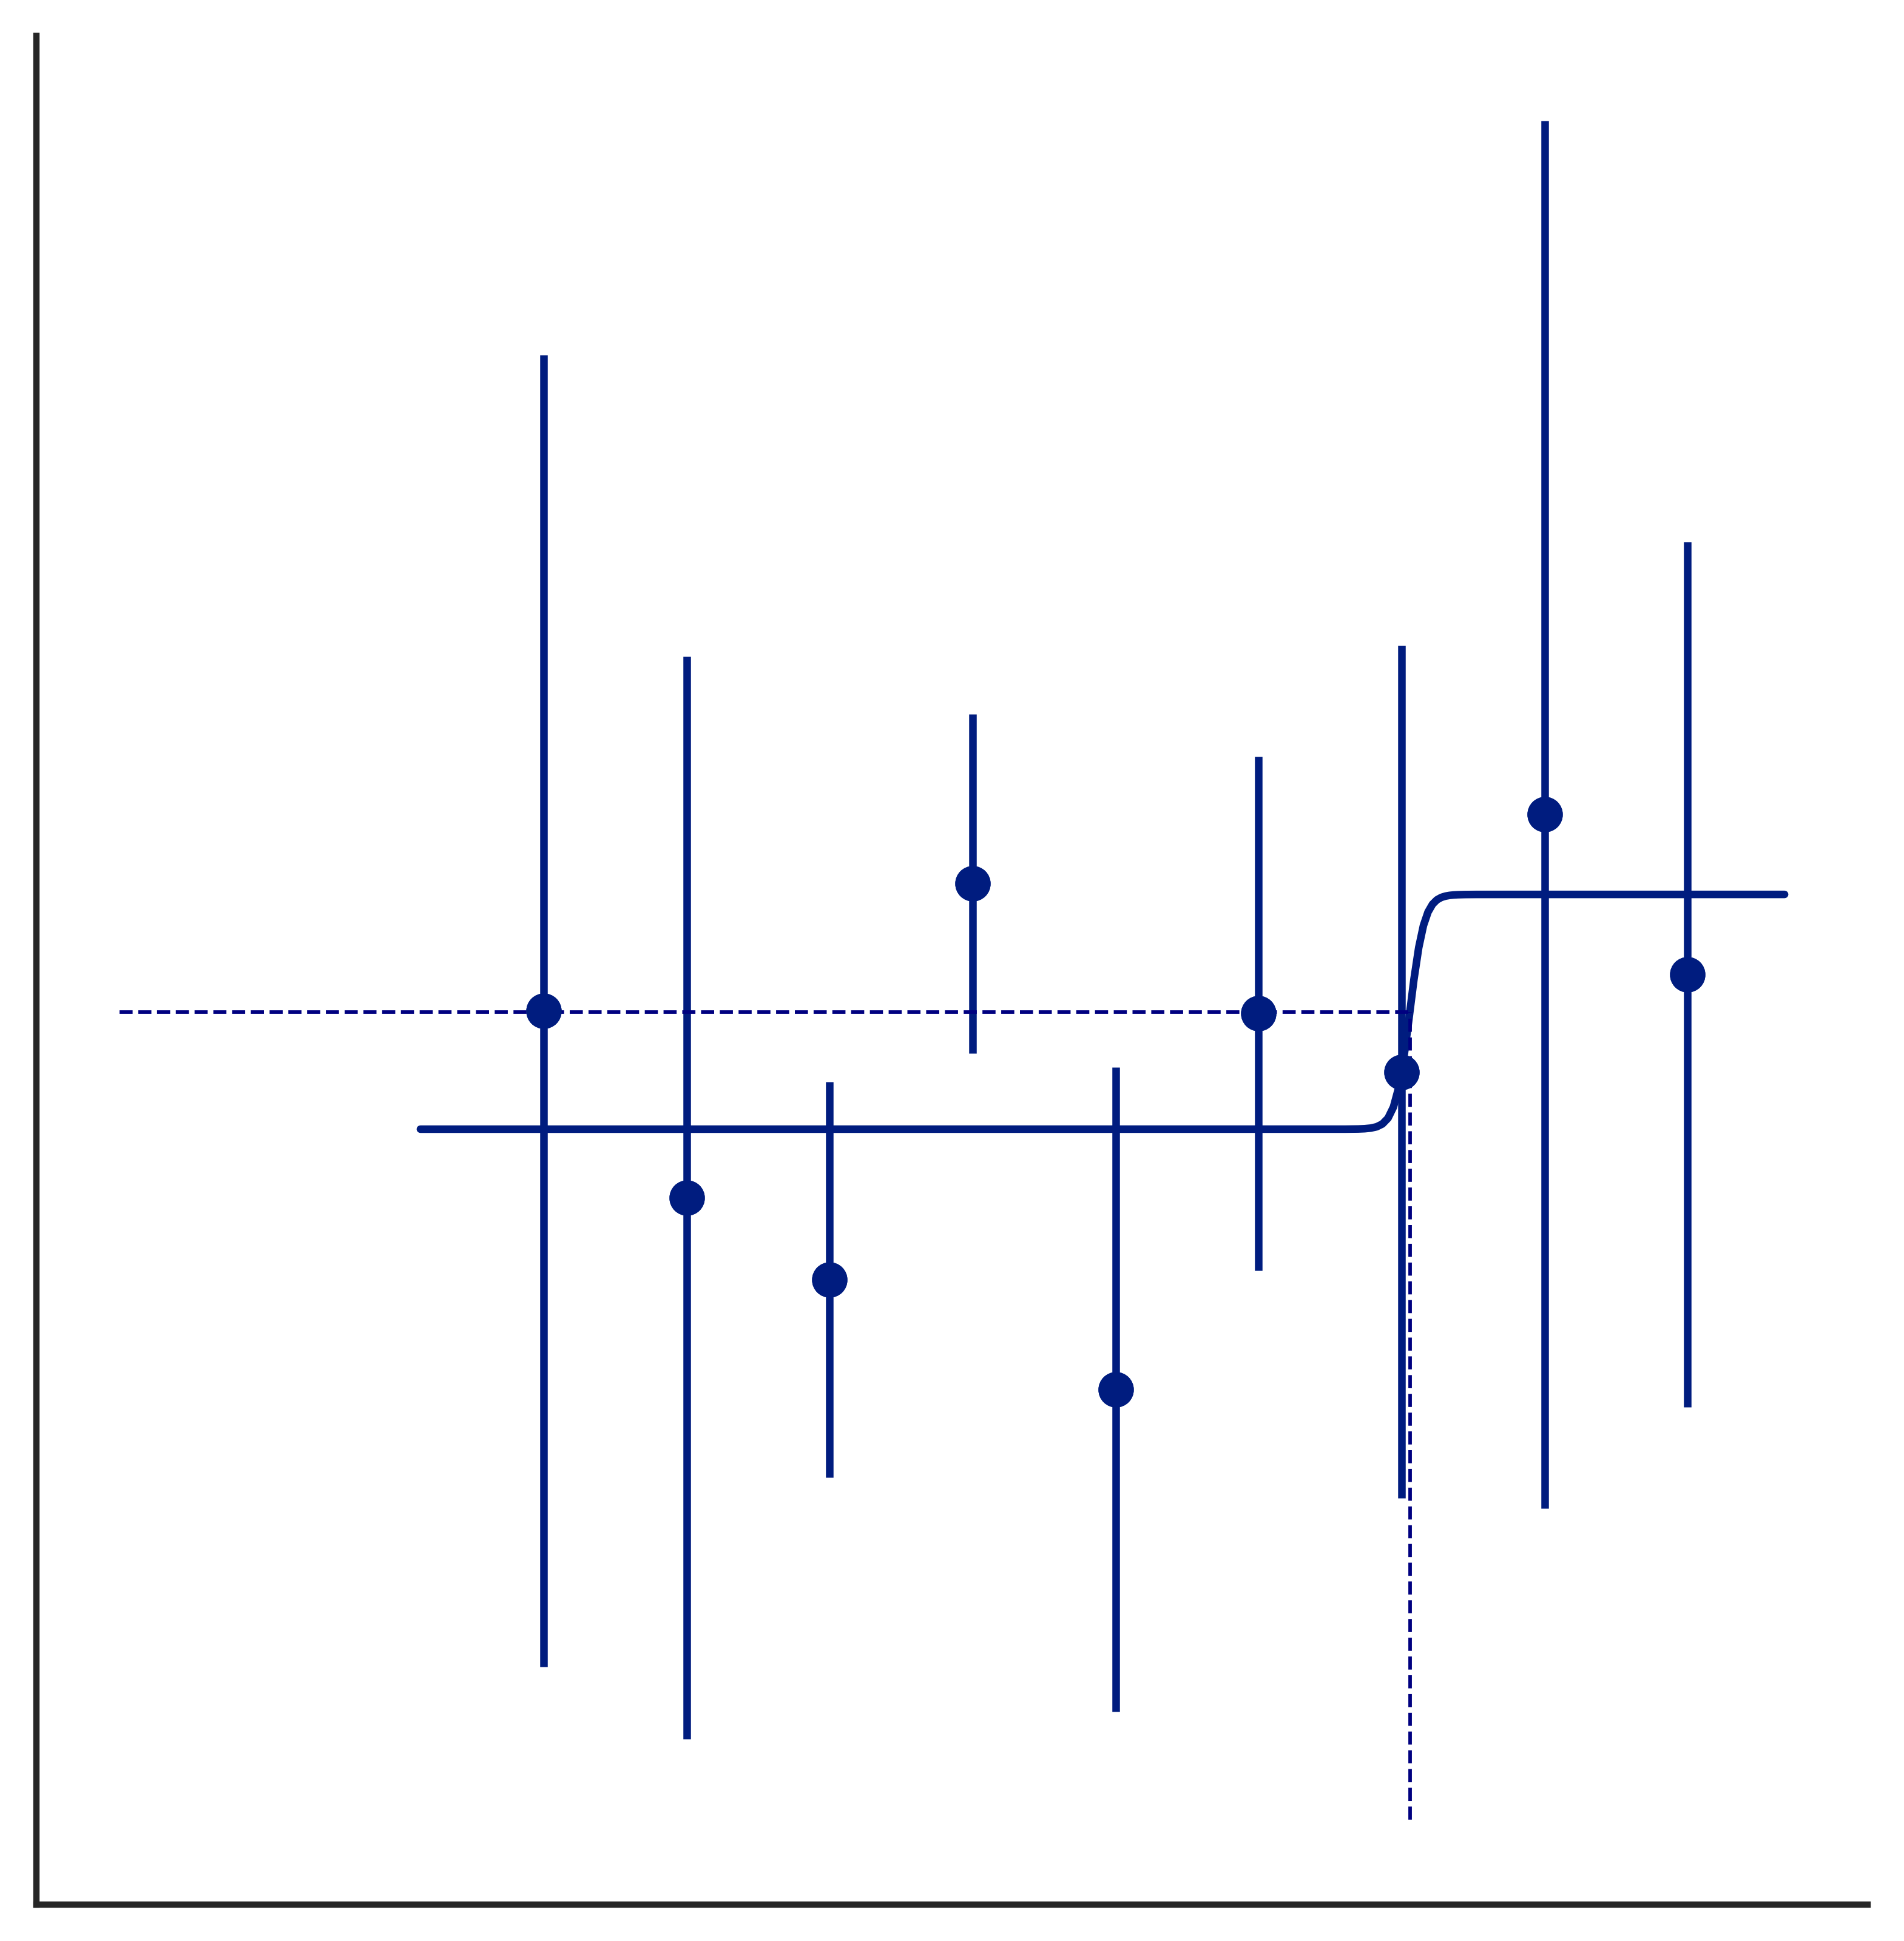

In [94]:
fitTable = GDSC_drugs(df = curve_data, y_label = 'Response', path = path)
if not fitTable.empty:
    fitTable.to_csv(path + '//fitTable.csv')
    
# show image
Image(filename = path +'//KALS-1-1.0_GDSC_fit.png', width = 400)

INFO:root:plot_polynomial: polynomial_KALS-1-1.0_failed.png saved to the output folder


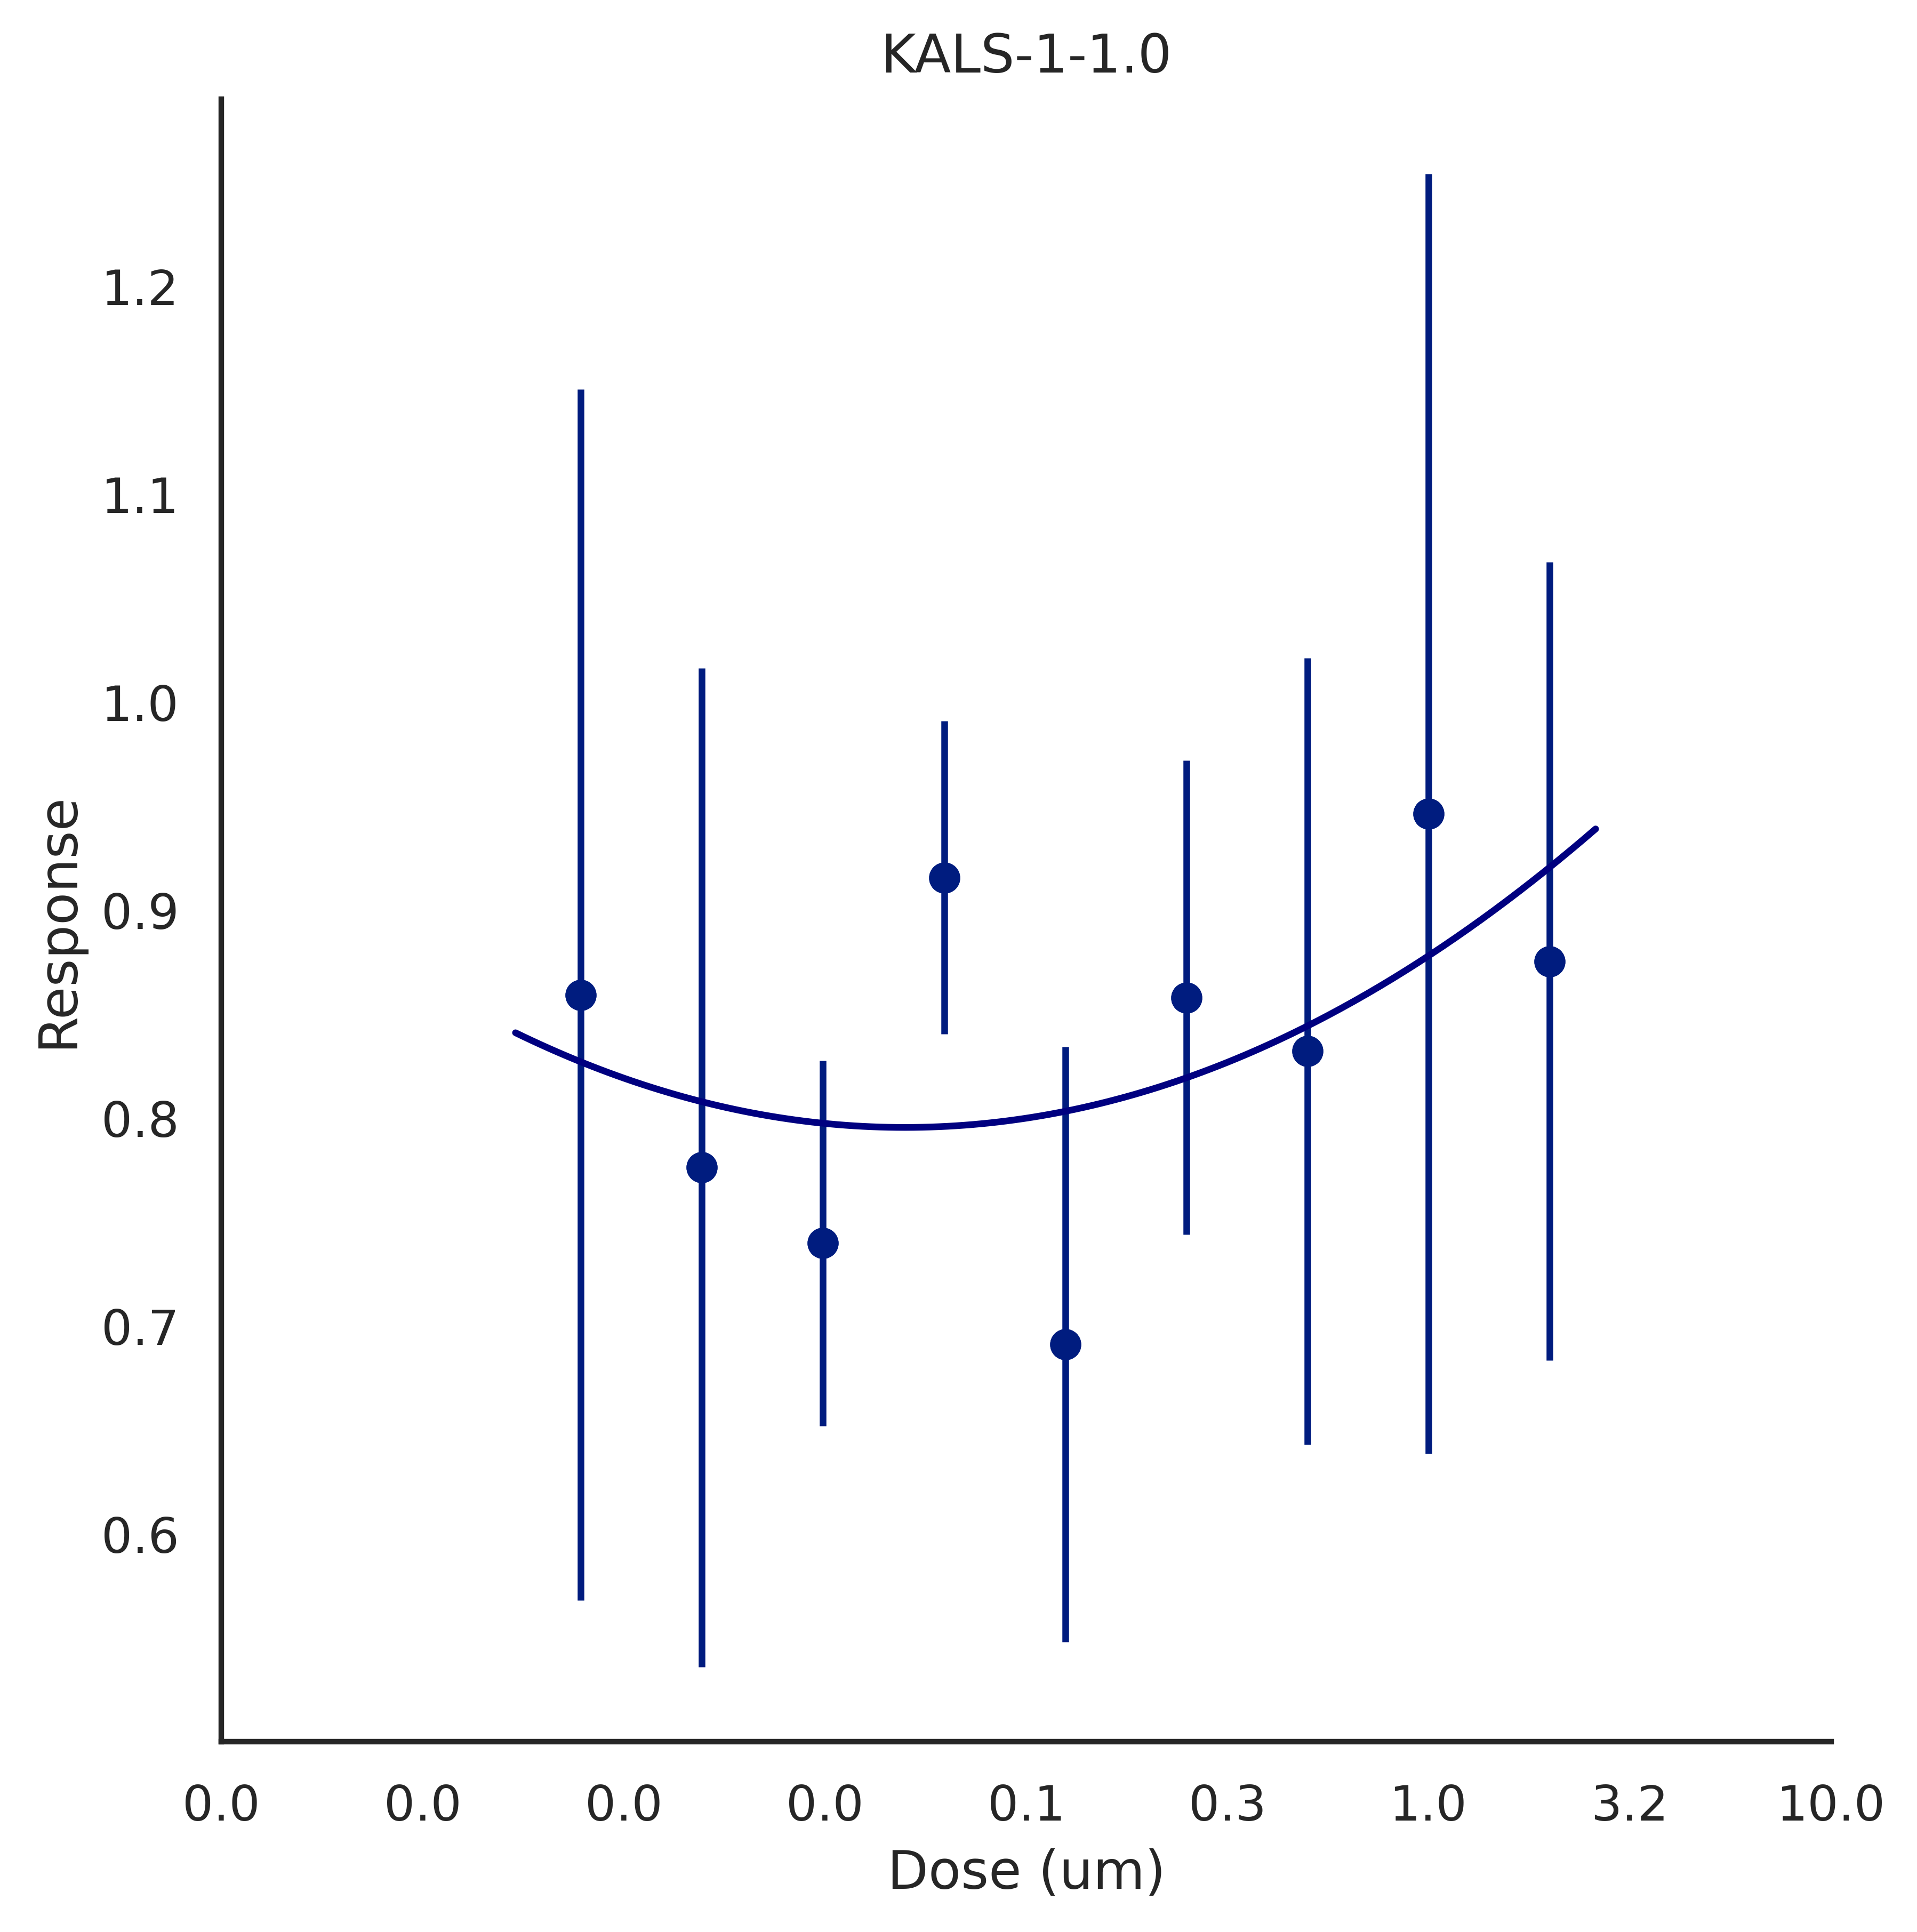

In [95]:
sd.plot_polynomial(df = curve_data, y_label = 'Response',  degree = 2, path = path, save_as = '_failed.png')

# show image
Image(filename = path + '//polynomial_KALS-1-1.0_failed.png', width = 400)


In [96]:
#try out with compound_id and cell_line_name from A388
Data_BALL_1_for_1004 = Triplicate_data_1.loc[(Triplicate_data_1['CELL_LINE_NAME'] == 'BALL-1') & (Triplicate_data_1['Compound_id'] == '1004.0')]
Data_BALL_1_for_1004.head()

,CELL_LINE_NAME,Compound_id,DRUGSET_ID,BARCODE,COSMIC_ID,CONC,INTENSITY
1209,BALL-1,1004.0,505_a_6,400308,910705,0.000781,0.834616
1210,BALL-1,1004.0,505_a_6,400310,910705,0.000781,0.805421
1211,BALL-1,1004.0,505_a_6,103708,910705,0.000781,0.999819
1212,BALL-1,1004.0,505_a_6,400308,910705,0.000391,0.865425
1213,BALL-1,1004.0,505_a_6,400310,910705,0.000391,0.813990


### Test run with Cell_Line BALL_1 on 1004 compound

In [97]:
curve_data = Data_BALL_1_for_1004.dropna(subset = ['CONC']).copy() 
curve_data.rename(columns = {'INTENSITY' : 'Response'}, inplace = True)
curve_data.rename(columns = {'CONC' : 'Dose'}, inplace = True)
curve_data.Compound_id = 'BALL-1-1004'
print(curve_data .shape)
display(curve_data.head(5))

(27, 7)


,CELL_LINE_NAME,Compound_id,DRUGSET_ID,BARCODE,COSMIC_ID,Dose,Response
1209,BALL-1,BALL-1-1004,505_a_6,400308,910705,0.000781,0.834616
1210,BALL-1,BALL-1-1004,505_a_6,400310,910705,0.000781,0.805421
1211,BALL-1,BALL-1-1004,505_a_6,103708,910705,0.000781,0.999819
1212,BALL-1,BALL-1-1004,505_a_6,400308,910705,0.000391,0.865425
1213,BALL-1,BALL-1-1004,505_a_6,400310,910705,0.000391,0.813990


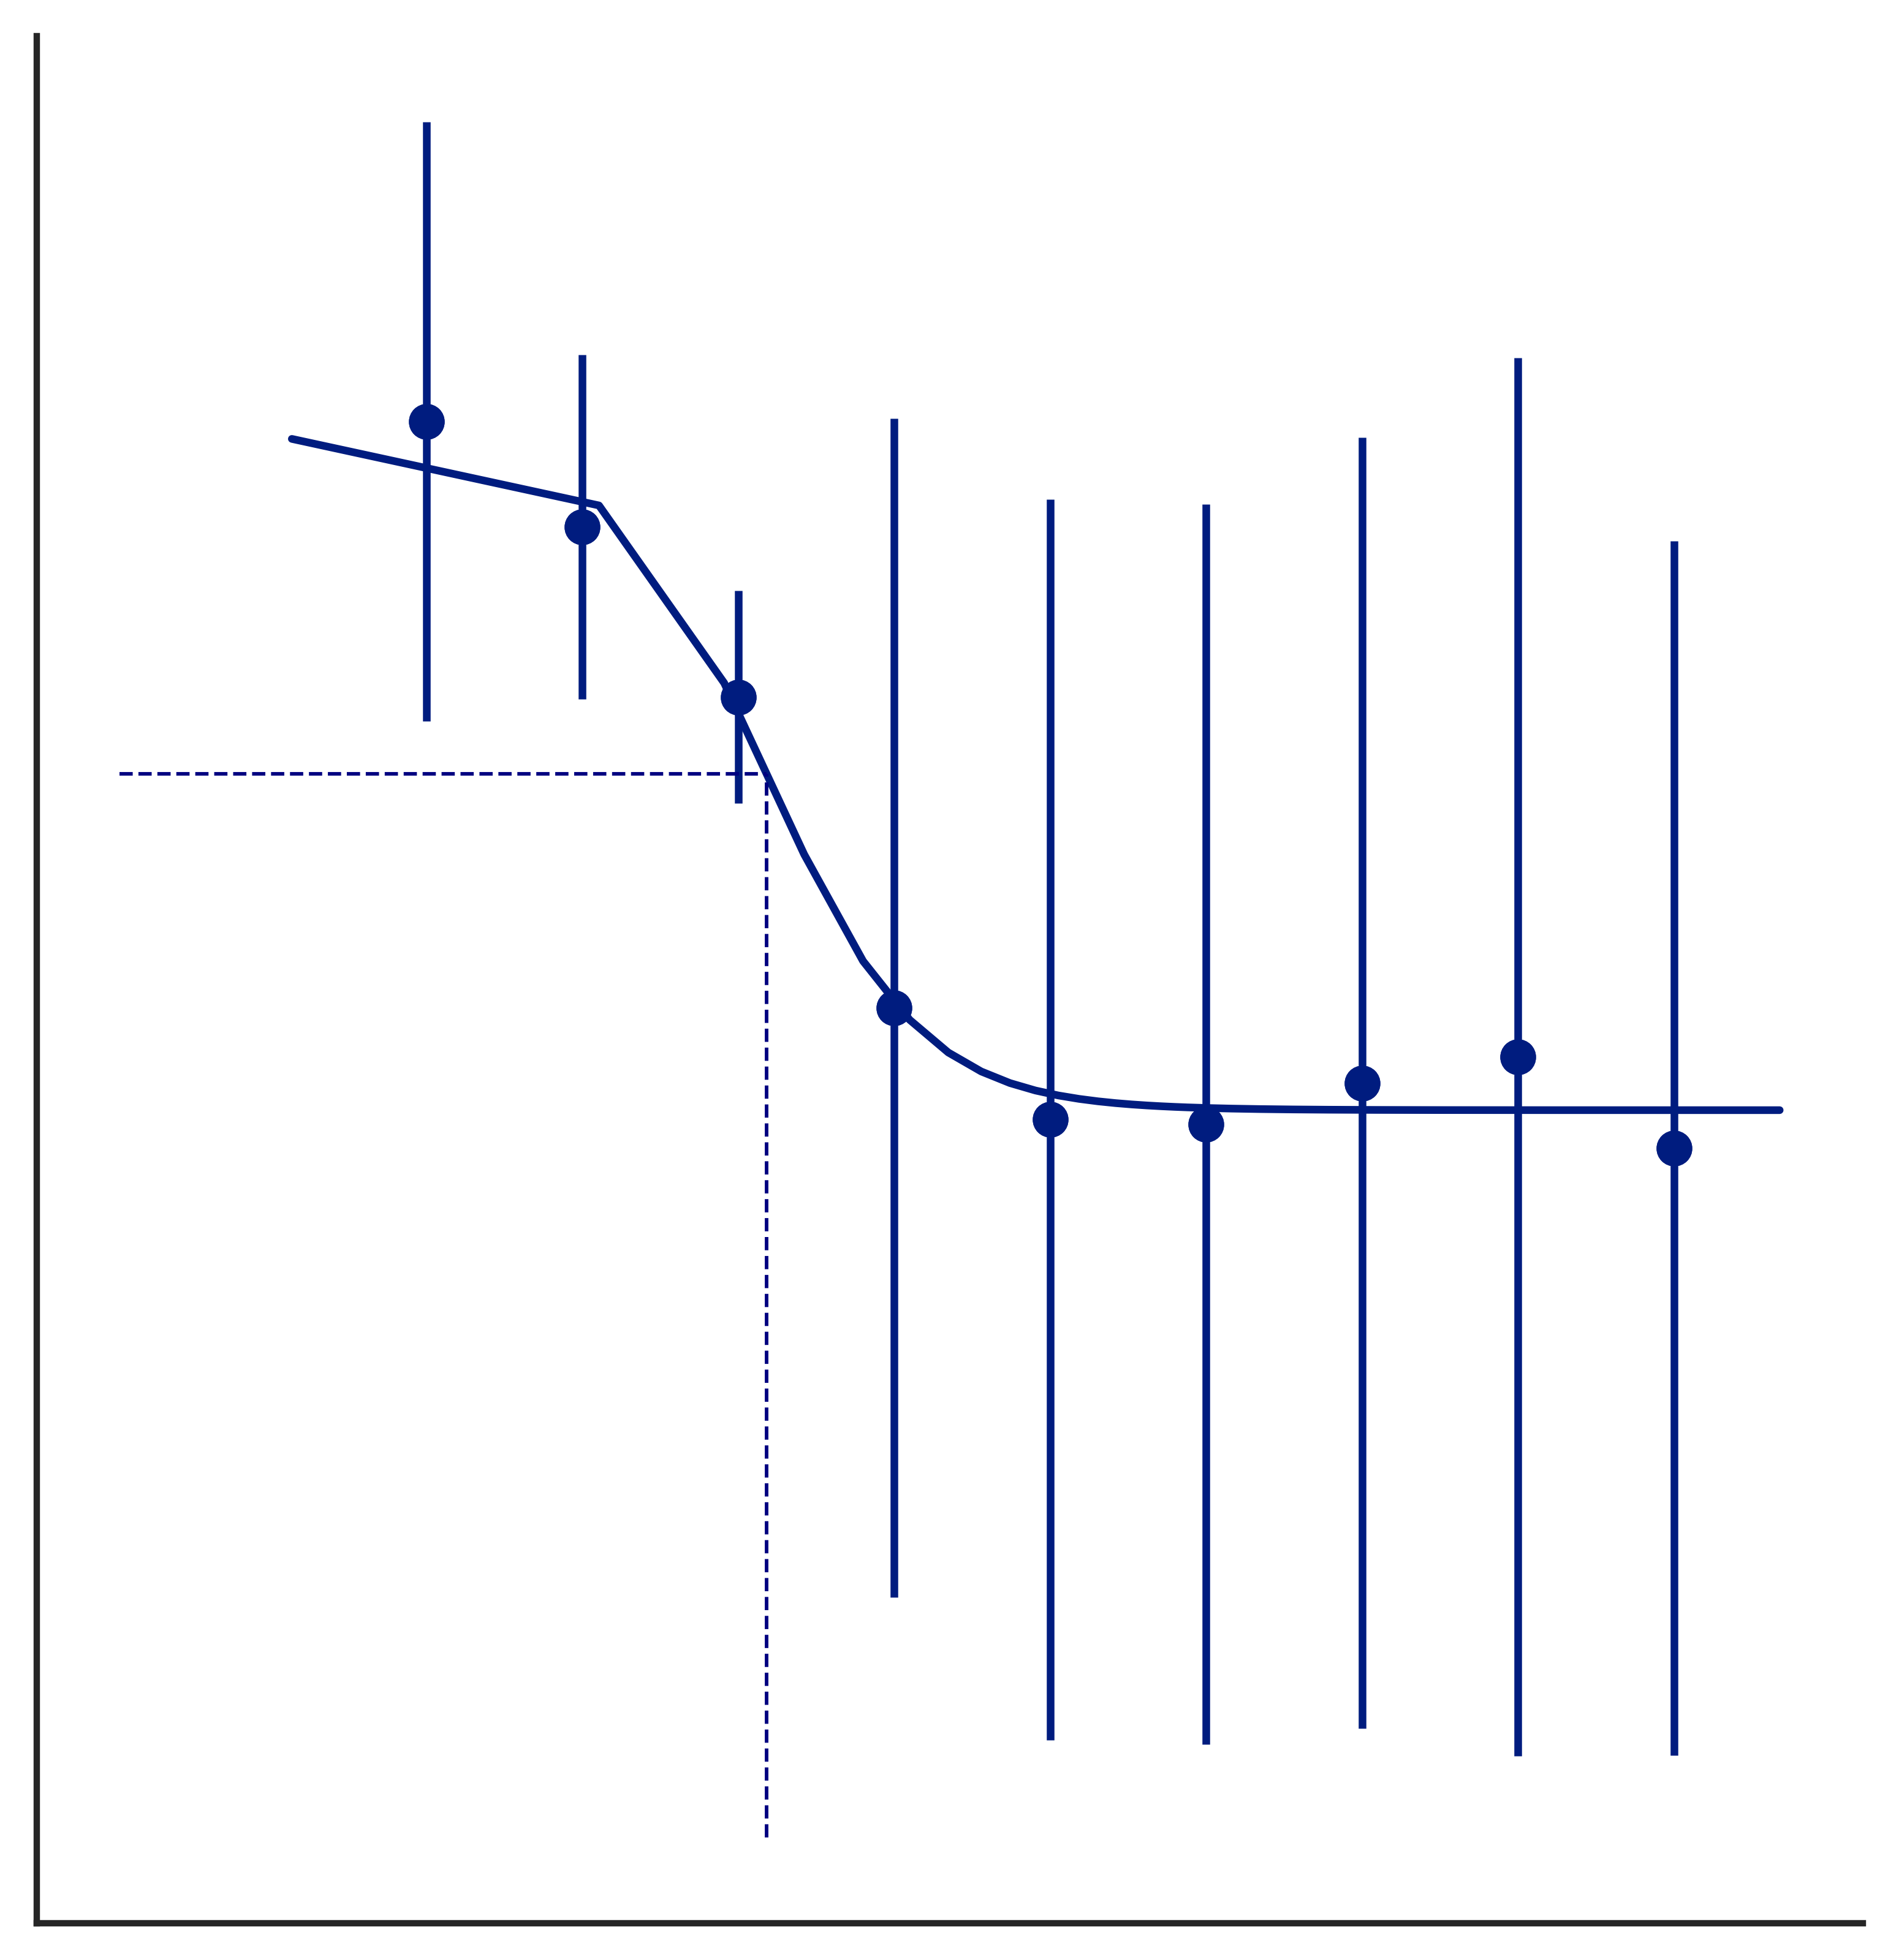

In [98]:
fitTable = GDSC_drugs(df = curve_data, y_label = 'Response', path = path)
if not fitTable.empty:
    fitTable.to_csv(path + '//fitTable.csv')
    
# show image
Image(filename = path +'//BALL-1-1004_GDSC_fit.png', width = 400)

### Test run with Cell_Line PC_14  on 1004 compound

In [99]:

#extract relevant rows
curve_data_3 = Data_PC_14_for_1004.dropna(subset = ['CONC']).copy() 
curve_data_3.rename(columns = {'INTENSITY' : 'Response'}, inplace = True)
curve_data_3.rename(columns = {'CONC' : 'Dose'}, inplace = True)
curve_data_3.Compound_id = 'PC-14-1003'
print(curve_data_3.shape)
display(curve_data_3.head(5))

(21, 7)


,CELL_LINE_NAME,Compound_id,DRUGSET_ID,BARCODE,COSMIC_ID,Dose,Response
1614,PC-14,PC-14-1003,284,19332,753608,0.100000,0.204445
1615,PC-14,PC-14-1003,284,19333,753608,0.100000,0.273444
1616,PC-14,PC-14-1003,284,19334,753608,0.100000,0.324886
1617,PC-14,PC-14-1003,284,19332,753608,0.031626,0.230788
1618,PC-14,PC-14-1003,284,19333,753608,0.031626,0.242078


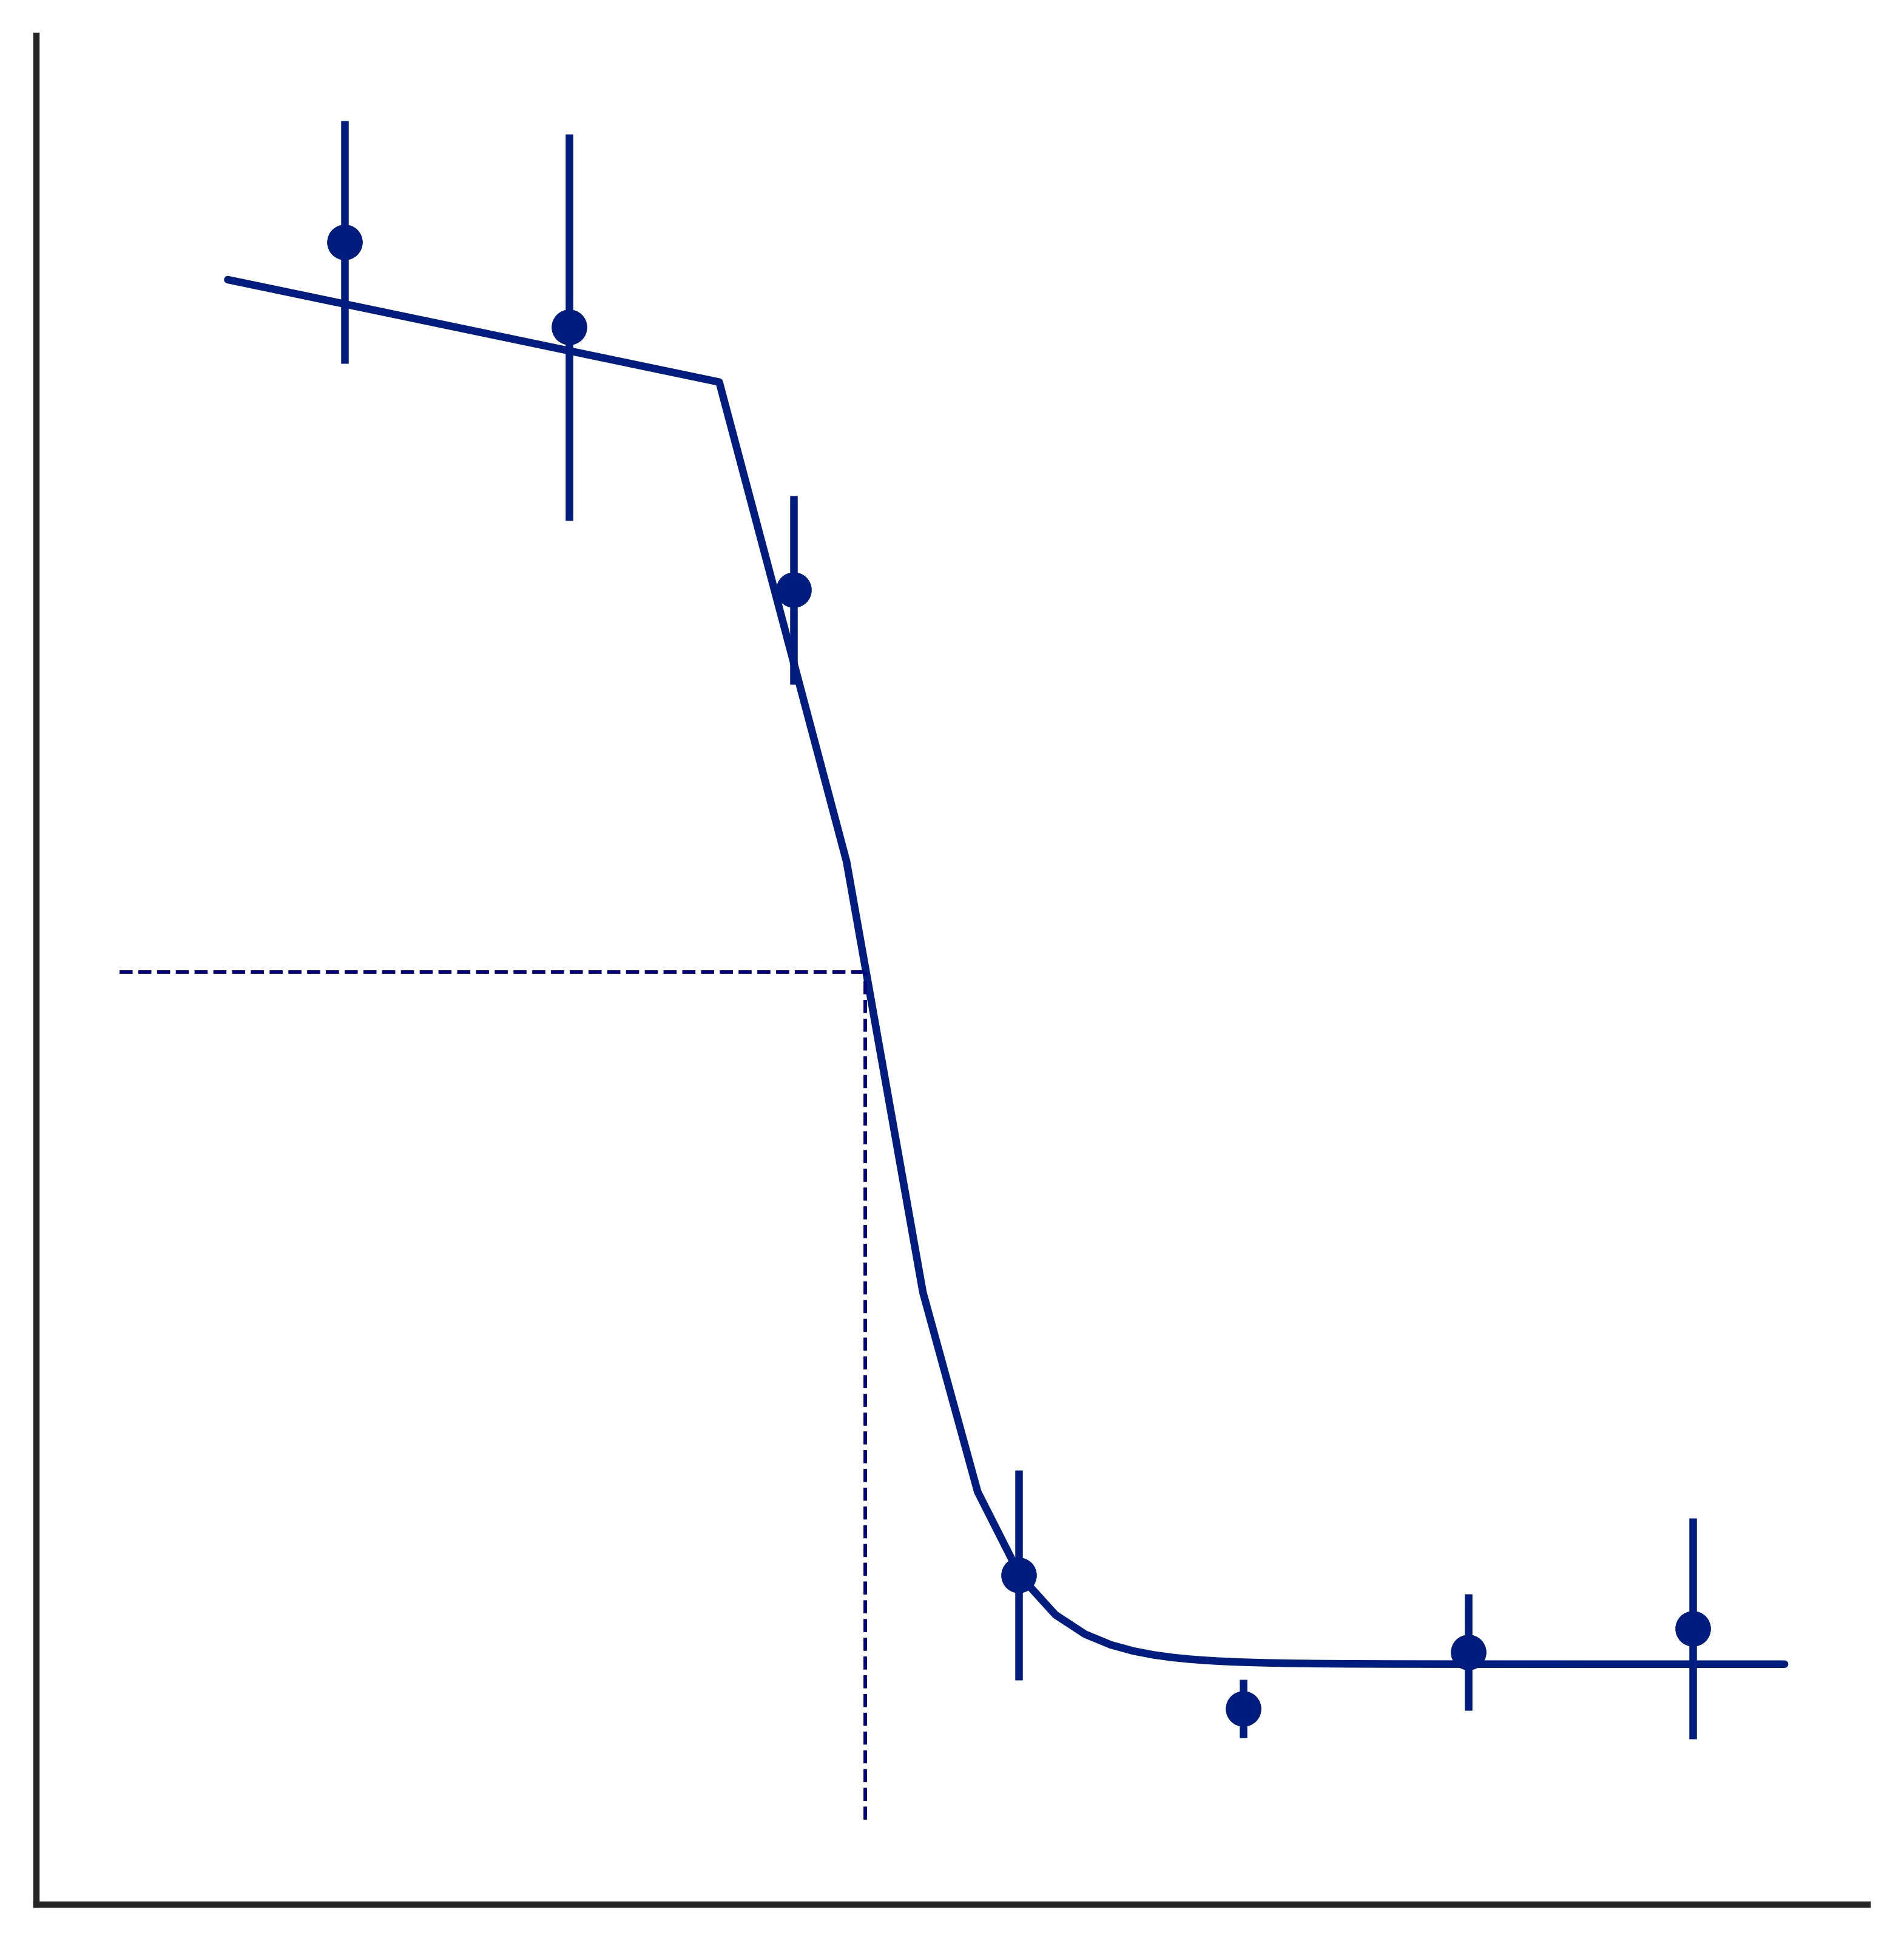

In [100]:
fitTable = GDSC_drugs(df = curve_data_3, y_label = 'Response', path = path)
if not fitTable.empty:
    fitTable.to_csv(path + '//fitTable.csv')
    
# show image
Image(filename = path +'//PC-14-1003_GDSC_fit.png', width = 400)

## Generate curves for all compounds

In [101]:
curve_data_combined_for_curve = curve_data_combined.copy()
print(curve_data_combined_for_curve .shape)
curve_data_combined_for_curve.head()

(146967, 8)


,CELL_LINE_NAME,Compound_id,DRUGSET_ID,BARCODE,COSMIC_ID,CONC,INTENSITY,CELL_LINE_NAME_Compound_id
0,KALS-1,1.0,15_a_7,015_8083_0001102,907271,2.000000,1.015526,KALS-1_1.0
1,KALS-1,1.0,15_a_7,015_8083_0001913,907271,2.000000,0.656699,KALS-1_1.0
2,KALS-1,1.0,15_a_7,015_8083_0002792,907271,2.000000,0.954190,KALS-1_1.0
3,KALS-1,1.0,15_a_7,015_8083_0001102,907271,0.007812,1.058671,KALS-1_1.0
4,KALS-1,1.0,15_a_7,015_8083_0001913,907271,0.007812,0.525115,KALS-1_1.0


In [102]:
curve_data_combined_for_curve.rename(columns = {'Compound_id' : 'DRUG_ID'}, inplace = True)
curve_data_combined_for_curve.rename(columns = {'CELL_LINE_NAME_Compound_id' : 'Compound_id'}, inplace = True)
curve_data_combined_for_curve.head()

,CELL_LINE_NAME,DRUG_ID,DRUGSET_ID,BARCODE,COSMIC_ID,CONC,INTENSITY,Compound_id
0,KALS-1,1.0,15_a_7,015_8083_0001102,907271,2.000000,1.015526,KALS-1_1.0
1,KALS-1,1.0,15_a_7,015_8083_0001913,907271,2.000000,0.656699,KALS-1_1.0
2,KALS-1,1.0,15_a_7,015_8083_0002792,907271,2.000000,0.954190,KALS-1_1.0
3,KALS-1,1.0,15_a_7,015_8083_0001102,907271,0.007812,1.058671,KALS-1_1.0
4,KALS-1,1.0,15_a_7,015_8083_0001913,907271,0.007812,0.525115,KALS-1_1.0


In [103]:
curve_data_combined_for_curve = curve_data_combined_for_curve.dropna(subset = ['CONC']).copy() 
curve_data_combined_for_curve.rename(columns = {'INTENSITY' : 'Response'}, inplace = True)
curve_data_combined_for_curve.rename(columns = {'CONC' : 'Dose'}, inplace = True)
print(curve_data_combined_for_curve .shape)
display(curve_data_combined_for_curve.head(5))
curve_data_combined_for_curve = curve_data_combined_for_curve

(146967, 8)


,CELL_LINE_NAME,DRUG_ID,DRUGSET_ID,BARCODE,COSMIC_ID,Dose,Response,Compound_id
0,KALS-1,1.0,15_a_7,015_8083_0001102,907271,2.000000,1.015526,KALS-1_1.0
1,KALS-1,1.0,15_a_7,015_8083_0001913,907271,2.000000,0.656699,KALS-1_1.0
2,KALS-1,1.0,15_a_7,015_8083_0002792,907271,2.000000,0.954190,KALS-1_1.0
3,KALS-1,1.0,15_a_7,015_8083_0001102,907271,0.007812,1.058671,KALS-1_1.0
4,KALS-1,1.0,15_a_7,015_8083_0001913,907271,0.007812,0.525115,KALS-1_1.0


In [104]:
%%time

#Count unique values on cell_line_compound

# variable to hold the count
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique
# values in height
for i in range(0, len(curve_data_combined_for_curve['Compound_id'])):
    
    if curve_data_combined_for_curve['Compound_id'][i] not in visited: 
        
        visited.append(curve_data_combined_for_curve['Compound_id'][i])
          
        cnt += 1

print("No.of.unique values :", cnt)
  
print("unique values :", visited)

No.of.unique values : 6661
unique values : ['KALS-1_1.0', 'BALL-1_1001.0', 'CAL-72_1001.0', 'DB_1001.0', 'DBTRG-05MG_1001.0', 'HuO-3N1_1001.0', 'MFE-280_1001.0', 'NY_1001.0', 'SK-N-DZ_1001.0', 'A3-KAW_1003.0', 'ALL-SIL_1003.0', 'BT-549_1003.0', 'CAL-29_1003.0', 'DiFi_1003.0', 'EJM_1003.0', 'EKVX_1003.0', 'FU-OV-1_1003.0', 'HCC-366_1003.0', 'HCC-78_1003.0', 'HCC1143_1003.0', 'HCC1937_1003.0', 'JVM-2_1003.0', 'KLE_1003.0', 'KYSE-520_1003.0', 'LC4-1_1003.0', 'MOLT-16_1003.0', 'NALM-6_1003.0', 'NB1_1003.0', 'NCI-H1944_1003.0', 'NCI-H196_1003.0', 'NCI-H2291_1003.0', 'NCI-H2452_1003.0', 'NCI-H2591_1003.0', 'NCI-H835_1003.0', 'NCI-N87_1003.0', 'NUGC-3_1003.0', 'OCI-M1_1003.0', 'OVKATE_1003.0', 'P12-ICHIKAWA_1003.0', 'RMG-I_1003.0', 'RT4_1003.0', 'SK-N-DZ_1003.0', 'SK-OV-3_1003.0', 'SK-PN-DW_1003.0', 'SNU-16_1003.0', 'SNU-387_1003.0', 'SNU-61_1003.0', 'SNU-81_1003.0', 'T98G_1003.0', 'TE-11_1003.0', 'TT_1003.0', 'TYK-nu_1003.0', 'U-118-MG_1003.0', 'A3-KAW_1004.0', 'A549_1004.0', 'BALL-1_1004.0'

In [106]:
#generate curve only first 200 rows [0:200]
#to generate all the curves remove slicing [0:200]
fitTable= GDSC_drugs(df = curve_data_combined_for_curve[0:200], y_label = 'Response', path = path)
display(round(fitTable, 2))
fitTable.to_csv(path + '//fitTable.csv')

Fitting curve failed:
Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Fitting curve failed:
Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


,N,hill slope,min response,max response,EC50,r_squared,residuals
Compound_id,,,,,,,
BALL-1_1001.0,9,34.49,0.63,1.00,251.63,0.91,0.02
CAL-72_1001.0,9,4.08,0.52,0.90,94.12,0.92,0.02
DB_1001.0,9,0.74,-0.14,0.79,651.13,0.95,0.02
KALS-1_1.0,9,28.50,0.91,0.81,0.52,0.30,0.04
MFE-280_1001.0,9,0.00,-32.74,34.83,105.52,0.33,0.22
NY_1001.0,4,0.00,-40.64,42.14,36.92,0.48,0.04


## END